In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [5]:
###Copy this for other files for full database combined
df06 = pd.read_csv("./Data/RB Research Data - 2006-2007.csv")
df07 = pd.read_csv("./Data/RB Research Data - 2007-2008.csv")
df08 = pd.read_csv("./Data/RB Research Data - 2008-2009.csv")
df09 = pd.read_csv("./Data/RB Research Data - 2009-2010.csv")
df10 = pd.read_csv("./Data/RB Research Data - 2010-2011.csv")
df11 = pd.read_csv("./Data/RB Research Data - 2011-2012.csv")
df12 = pd.read_csv("./Data/RB Research Data - 2012-2013.csv")
df13 = pd.read_csv("./Data/RB Research Data - 2013-2014.csv")
df14 = pd.read_csv("./Data/RB Research Data - 2014-2015.csv")
df15 = pd.read_csv("./Data/RB Research Data - 2015-2016.csv")
df16 = pd.read_csv("./Data/RB Research Data - 2016-2017.csv")
df17 = pd.read_csv("./Data/RB Research Data - 2017-2018.csv")
df18 = pd.read_csv("./Data/RB Research Data - 2018-2019.csv")
df19 = pd.read_csv("./Data/RB Research Data - 2019-2020.csv")
df20 = pd.read_csv("./Data/RB Research Data - 2020-2021.csv")
df21 = pd.read_csv("./Data/RB Research Data - 2021-2022.csv")
df22 = pd.read_csv("./Data/RB Research Data - 2022-2023.csv")
df = pd.concat([df06, df07, df08, df09, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22])
df = df[df['AAV Adjusted'] != -1]
df = df[df["Games Played"] > 8]


In [20]:
#Get nonrookie contract players who played at least half the season
vets = df[df["Rookie Contract (Y/N)"] == "N"]
vets = vets[vets["Games Played"] > 8]
#vets = vets[vets["Contract Length"] > 1.0]
vets = vets[vets["Contract Length"] > 1] #53 occurnces of 1 year deals
vets

,Player Name,Team,Year,Rookie Contract (Y/N),Contract Length,Total Pay,Yearly Pay (AAV),Team Payroll,Player Percentage of Payroll,Games Played,...,Team Rushing Yards,Team Total Yards,Team Total Touchdowns,Player Percentage of Rushing Yards,Player Percentage of Offensive Yards,Player Percentage of Touchdowns,AAV Adjusted,Total Pay Adjusted,Payroll Adjusted,Unnamed: 0
11,Ahman Green,GB,2006,N,1.0,2350000.0,2350000.0,102000000,0.023039,14,...,1663,5458,27,0.634997,0.264566,0.222222,3.579050e+06,3.579050e+06,155346000.0,NaN
12,Ron Dayne,HOU,2006,N,1.0,600000.0,600000.0,102000000,0.005882,11,...,1685,4463,27,0.357864,0.152364,0.185185,9.138000e+05,9.138000e+05,155346000.0,NaN
7,Jamal Lewis,CLE,2007,N,1.0,3500000.0,3500000.0,109000000,0.032110,14,...,1330,4692,42,0.279625,0.332268,0.261905,5.183500e+06,5.183500e+06,161429000.0,NaN
11,Ryan Grant,GB,2007,N,1.0,315000.0,315000.0,109000000,0.002890,16,...,1597,5931,43,0.199966,0.224920,0.255814,4.665150e+05,4.665150e+05,161429000.0,NaN
12,Ron Dayne,HOU,2007,N,1.0,1300000.0,1300000.0,109000000,0.011927,13,...,1586,5337,36,0.144838,0.165823,0.166667,1.925300e+06,1.925300e+06,161429000.0,NaN
19,Ricky Williams,MIA,2009,N,1.0,5000000.0,5000000.0,123000000,0.040650,16,...,2231,5401,37,0.502465,0.256434,0.351351,7.155000e+06,7.155000e+06,176013000.0,NaN
17,Mike Tolbert,SD/LAC,2010,N,1.0,1835000.0,1835000.0,0,0.000000,15,...,1810,6329,48,0.407182,0.146153,0.229167,2.583680e+06,2.583680e+06,0.0,NaN
19,Ronnie Brown,MIA,2010,N,1.0,3969239.0,3969239.0,0,0.000000,16,...,1643,5170,25,0.446744,0.188781,0.200000,5.588689e+06,5.588689e+06,0.0,NaN
6,Cedric Benson,CIN,2011,N,1.0,4500000.0,4500000.0,108249005,0.041571,16,...,1778,5118,31,0.613048,0.228605,0.225806,6.142500e+06,6.142500e+06,147759891.8,NaN
12,Arian Foster,HOU,2011,N,1.0,525000.0,525000.0,120701303,0.004350,15,...,2448,5954,38,0.616422,0.366644,0.394737,7.166250e+05,7.166250e+05,164757278.6,NaN


In [21]:
rooks = df[df["Rookie Contract (Y/N)"] == "Y"]
rooks = rooks[rooks["Games Played"] > 8]
rooks

,Player Name,Team,Year,Rookie Contract (Y/N),Contract Length,Total Pay,Yearly Pay (AAV),Team Payroll,Player Percentage of Payroll,Games Played,...,Team Rushing Yards,Team Total Yards,Team Total Touchdowns,Player Percentage of Rushing Yards,Player Percentage of Offensive Yards,Player Percentage of Touchdowns,AAV Adjusted,Total Pay Adjusted,Payroll Adjusted,Unnamed: 0
3,Willis McGahee,BUF,2006,Y,5.0,7053000.0,1410600.00,102000000,0.013829,14,...,1552,4271,28,0.641108,0.269492,0.214286,2148343.800,1.074172e+07,155346000.0,NaN
8,Julius Jones,DAL,2006,Y,4.0,3280000.0,820000.00,102000000,0.008039,17,...,1936,5772,47,0.617769,0.231809,0.085106,1248860.000,4.995440e+06,155346000.0,NaN
9,Tatum Bell,DEN,2006,Y,4.0,3180000.0,795000.00,102000000,0.007794,13,...,2152,4951,32,0.473978,0.229247,0.062500,1210785.000,4.843140e+06,155346000.0,NaN
10,Kevin Jones,DET,2006,Y,5.0,5737500.0,1147500.00,102000000,0.011250,12,...,1129,4949,30,0.608503,0.241463,0.266667,1747642.500,8.738212e+06,155346000.0,NaN
13,Joseph Addai,IND,2006,Y,5.0,10665000.0,2133000.00,102000000,0.020912,20,...,1762,6070,48,0.777526,0.298682,0.208333,3248559.000,1.624280e+07,155346000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,Saquon Barkley,NYG,2022,Y,4.0,31194751.0,7798687.75,203667109,0.038291,18,...,2519,5676,38,0.566098,0.324348,0.315789,8180823.450,3.272329e+07,213646797.3,NaN
25,Miles Sanders,PHI,2022,Y,4.0,5350175.0,1337543.75,219359743,0.006097,20,...,2509,6614,57,0.565564,0.226792,0.228070,1403083.394,5.612334e+06,230108370.4,NaN
26,Najee Harris,PIT,2022,Y,4.0,13047447.0,3261861.75,210658592,0.015484,17,...,2073,5484,28,0.500724,0.231036,0.357143,3421692.976,1.368677e+07,220980863.0,NaN
28,Kenneth Walker III,SEA,2022,Y,4.0,8441581.0,2110395.25,215796566,0.009780,16,...,2042,5976,42,0.545054,0.214357,0.238095,2213804.617,8.855218e+06,226370597.7,NaN


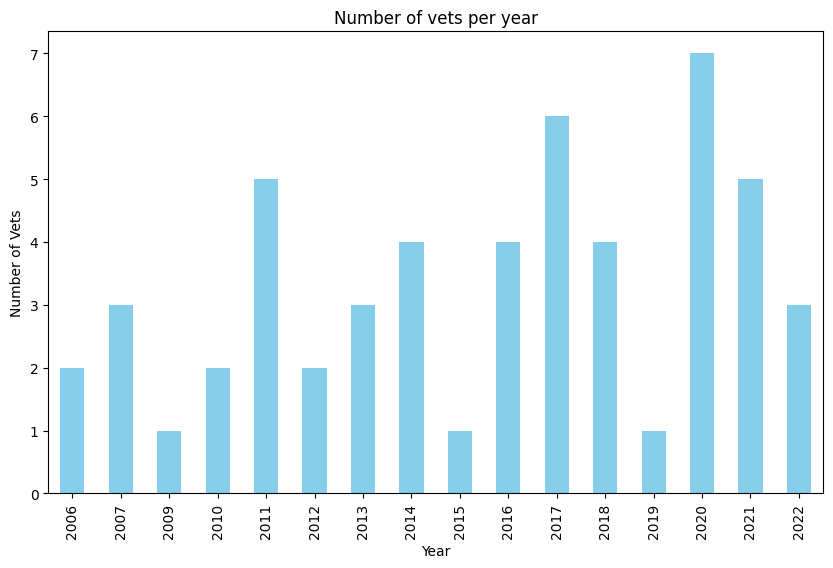

In [29]:
vets_1 = df[df["Rookie Contract (Y/N)"] == "N"]
vets_1 = vets[vets["Games Played"] > 8]
#vets = vets[vets["Contract Length"] > 1.0]
vets_1 = vets[vets["Contract Length"] == 1] #53 occurnces of 1 year deals

temp = vets_1.value_counts("Year")
temp_sorted = temp.sort_index()

# Plotting the results
plt.figure(figsize=(10, 6))
temp_sorted.plot(kind='bar', color='skyblue')
plt.title('Number of vets per year')
plt.xlabel('Year')
plt.ylabel('Number of Vets')
plt.show()

In [23]:
v_length = vets.groupby('Year')['Contract Length'].mean()
r_length = rooks.groupby('Year')['Contract Length'].mean()

In [24]:
v_length

Year
2006    1.0
2007    1.0
2009    1.0
2010    1.0
2011    1.0
2012    1.0
2013    1.0
2014    1.0
2015    1.0
2016    1.0
2017    1.0
2018    1.0
2019    1.0
2020    1.0
2021    1.0
2022    1.0
Name: Contract Length, dtype: float64

Text(0.5, 1.0, 'Average Contract Length of RBs not on rookie deals')

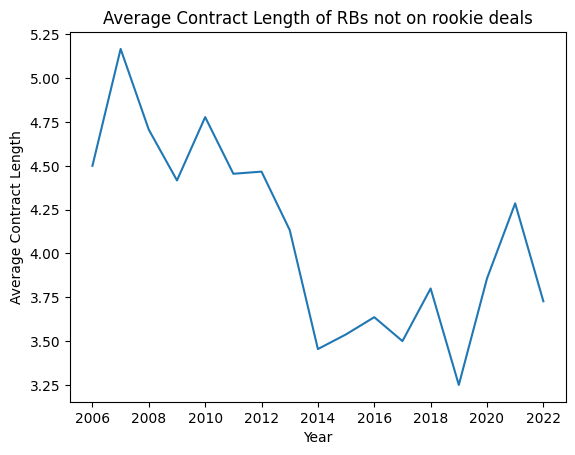

In [11]:
plt.plot(v_length)
plt.xlabel('Year')
plt.ylabel('Average Contract Length')
plt.title('Average Contract Length of RBs not on rookie deals')

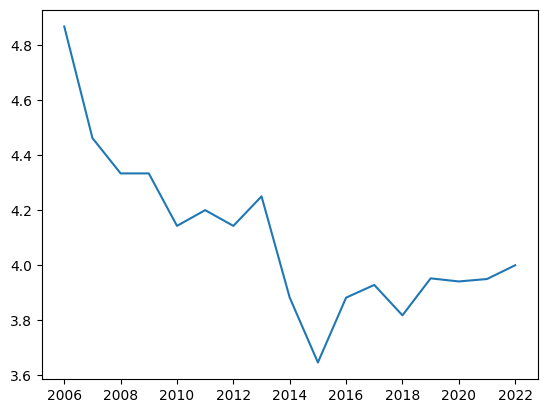

In [12]:
plt.plot(r_length)